# RF

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
file_path_RFL = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_RFL = pd.read_csv(file_path_RFL)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'FSO_Att' in data_RFL.columns:
    data_RFL = data_RFL.drop(['FSO_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 6 for FSO
filtered_data_RFL = data_RFL[data_RFL['SYNOPCode'] == 6]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_RFL= pd.get_dummies(filtered_data_RFL, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_RFL.columns:
    df_RFL['sin_time'] = np.sin(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL['cos_time'] = np.cos(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_RFL


,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_6,sin_time,cos_time
11,6.192648,17.110882,18.253512,16.136476,2121.742706,73500000000,31.166958,32.256659,28.610426,0.308828,...,22307.090730,24148.041177,20911.945622,85.849354,1.130489,2.281437,1.073491,1,1.224647e-16,-1.000000
12,8.419039,17.094251,18.265652,15.789381,2113.301859,83500000000,38.636019,40.251065,36.001099,0.318151,...,16474.118480,16954.163370,15683.965312,47.570930,1.442658,2.391959,1.347874,1,1.224647e-16,-1.000000
13,6.846505,17.177814,17.774541,16.768849,2119.552177,73500000000,38.348434,40.345707,36.866758,0.135564,...,17190.523660,17219.832084,16952.179620,88.563250,1.376956,2.283721,1.250756,1,1.224647e-16,-1.000000
49,8.868540,17.353415,18.461959,15.814342,2114.326609,73500000000,190.577149,193.722437,173.950657,0.418631,...,7917.023277,8474.387974,7204.754668,89.522022,1.204814,3.846755,1.161786,1,-8.660254e-01,0.500000
50,9.403091,17.242779,17.822939,16.460828,2113.137305,83500000000,196.020128,204.063509,196.002472,0.307459,...,7801.012785,8345.523848,7352.656897,84.904703,0.688722,2.028351,0.676013,1,-8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82966,12.361672,4.453328,4.490946,4.315968,4819.467079,83500000000,7.072978,7.184239,6.769559,0.000000,...,32693.675790,33675.329175,31475.465928,26.968102,0.000000,2.283157,0.000000,1,9.659258e-01,0.258819
82967,12.596448,4.494811,4.816636,4.147151,4824.776440,73500000000,14.023997,14.476732,13.299350,0.000000,...,28576.467700,29251.544490,26632.209114,125.432873,0.000000,0.780760,0.000000,1,9.659258e-01,0.258819
82980,12.003689,4.562548,4.840463,4.464255,4827.793957,83500000000,129.129206,132.306381,120.262614,0.000000,...,5897.208961,6288.001741,5618.975859,83.253349,0.000000,1.091074,0.000000,1,9.659258e-01,0.258819
82981,14.149046,4.444572,4.735181,4.118985,4822.518200,73500000000,269.725512,276.902106,259.845617,1.690084,...,3643.884024,3809.397962,3643.467700,85.765391,0.000000,1.201067,0.000000,1,9.659258e-01,0.258819


In [2]:

# Split the FSO data into features and target
X_RFL= df_RFL.drop(['RFL_Att'], axis=1)  # Features for FSO
y_RFL= df_RFL['RFL_Att']  # Target for FSO

In [3]:
# Split the FSO data into training and test sets
X_train_RFL, X_test_RFL, y_train_RFL, y_test_RFL = train_test_split(X_RFL, y_RFL, test_size=0.2, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_RFL = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_RFL = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_RFL = RandomizedSearchCV(
    estimator=rf_RFL,
    param_distributions=param_distributions_RFL,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_RFL.fit(X_train_RFL, y_train_RFL)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D408E3410>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D408E1590>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D408E2A10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D3A883190>},
                   random_state=42, verbose=1)

In [4]:
# The best hyperparameters and score for FSO
best_params_RFL = random_search_RFL.best_params_
best_score_RFL= random_search_RFL.best_score_
print(f"Best hyperparameters for FSO: {best_params_RFL}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_RFL}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9577139199983726


In [5]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL = pd.DataFrame(X_train_RFL, columns=df_RFL.drop('RFL_Att', axis=1).columns)
train_df_RFL['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL= rank_variables_oob(train_df_RFL, 'RFL_Att', best_params_RFL)
print(rankings_table_RFL)


         Removed Variable     RSMSE       R^2  Remaining Variables
7                sin_time  0.762926  0.964669                   18
6             Particulate  0.763799  0.964588                   19
10              Frequency  0.765902  0.964392                   15
5          TemperatureMin  0.767431  0.964250                   20
4               WindSpeed  0.769482  0.964059                   21
9          TemperatureMax  0.769539  0.964053                   16
3            WindSpeedMax  0.772472  0.963779                   22
2            WindSpeedMin  0.772592  0.963768                   23
0             SYNOPCode_6  0.775365  0.963507                   25
8     AbsoluteHumidityMin  0.775525  0.963492                   17
1           WindDirection  0.775859  0.963461                   24
11               cos_time  0.887200  0.952221                   14
13  TemperatureDifference  0.917292  0.948925                   12
12          VisibilityMin  0.918337  0.948808                 

In [6]:
FSO_table=rankings_table_RFL
rankings_table_RFL 

,Removed Variable,RSMSE,R^2,Remaining Variables
7,sin_time,0.762926,0.964669,18
6,Particulate,0.763799,0.964588,19
10,Frequency,0.765902,0.964392,15
5,TemperatureMin,0.767431,0.964250,20
4,WindSpeed,0.769482,0.964059,21
9,TemperatureMax,0.769539,0.964053,16
3,WindSpeedMax,0.772472,0.963779,22
2,WindSpeedMin,0.772592,0.963768,23
0,SYNOPCode_6,0.775365,0.963507,25
8,AbsoluteHumidityMin,0.775525,0.963492,17


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_27068\2577233247.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


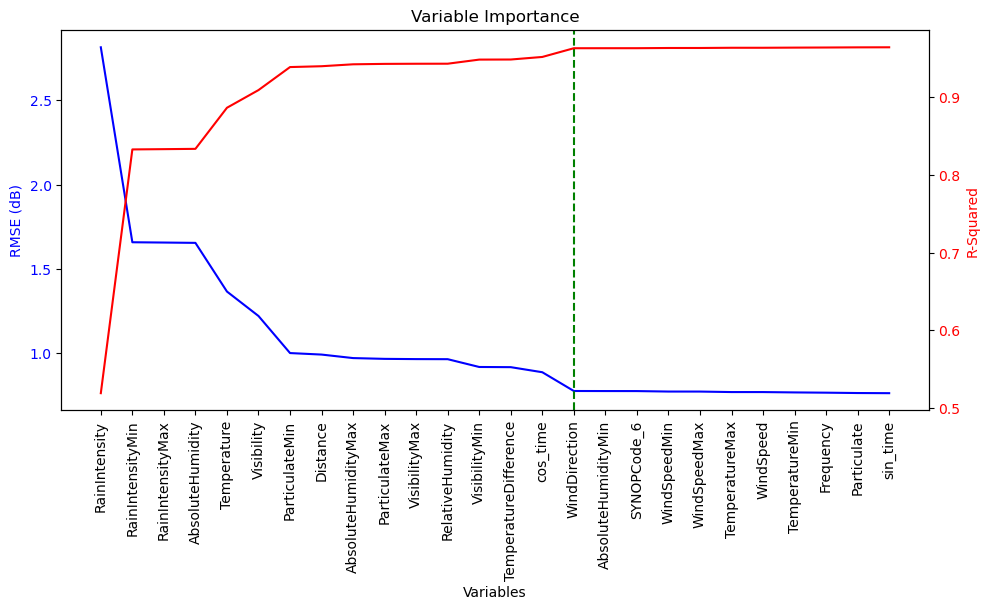

In [23]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 15
cutoff_variable = rankings_table_sorted_RFL.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [38]:
selected_features_RFL= [
    'WindDirection',
    'cos_time',
    'TemperatureDifference',
    'VisibilityMin',
    'RelativeHumidity',
    'VisibilityMax',
    'ParticulateMax',
    'AbsoluteHumidityMax',
    'Distance',
    'ParticulateMin',
    'Visibility',
    'Temperature',
    'AbsoluteHumidity',
    'RainIntensityMax',
    'RainIntensityMin',
    'RainIntensity'
  
]

In [39]:
# Select only the chosen features for training and testing
X_train_selected_RFL = X_train_RFL[selected_features_RFL]
X_test_selected_RFL = X_test_RFL[selected_features_RFL]

# Retrain the model with the selected features and best hyperparameters
final_model_RFL= RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_RFL = final_model_RFL.predict(X_test_selected_RFL)

# Calculate RMSE and R-squared on the testing set
test_rmse_RFL= mean_squared_error(y_test_RFL, predictions_RFL, squared=False)
test_r2_RFL = r2_score(y_test_RFL, predictions_RFL)

print(f"Test RMSE: {test_rmse_RFL}")
print(f"Test R^2: {test_r2_RFL}")


Test RMSE: 0.8809803396813329
Test R^2: 0.950819218896934


# FSO

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
fso_file_path = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_FSO = pd.read_csv(fso_file_path)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'RFL_Att' in data_FSO.columns:
    data_FSO = data_FSO.drop(['RFL_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 6 for FSO
filtered_data_FSO = data_FSO[data_FSO['SYNOPCode'] == 6]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_FSO = pd.get_dummies(filtered_data_FSO, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_FSO.columns:
    df_FSO['sin_time'] = np.sin(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO['cos_time'] = np.cos(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_FSO


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_6,sin_time,cos_time
11,9.454984,17.110882,18.253512,16.136476,2121.742706,73500000000,31.166958,32.256659,28.610426,0.308828,...,22307.090730,24148.041177,20911.945622,85.849354,1.130489,2.281437,1.073491,1,1.224647e-16,-1.000000
12,10.225244,17.094251,18.265652,15.789381,2113.301859,83500000000,38.636019,40.251065,36.001099,0.318151,...,16474.118480,16954.163370,15683.965312,47.570930,1.442658,2.391959,1.347874,1,1.224647e-16,-1.000000
13,10.464235,17.177814,17.774541,16.768849,2119.552177,73500000000,38.348434,40.345707,36.866758,0.135564,...,17190.523660,17219.832084,16952.179620,88.563250,1.376956,2.283721,1.250756,1,1.224647e-16,-1.000000
49,9.688760,17.353415,18.461959,15.814342,2114.326609,73500000000,190.577149,193.722437,173.950657,0.418631,...,7917.023277,8474.387974,7204.754668,89.522022,1.204814,3.846755,1.161786,1,-8.660254e-01,0.500000
50,9.860963,17.242779,17.822939,16.460828,2113.137305,83500000000,196.020128,204.063509,196.002472,0.307459,...,7801.012785,8345.523848,7352.656897,84.904703,0.688722,2.028351,0.676013,1,-8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82966,9.388685,4.453328,4.490946,4.315968,4819.467079,83500000000,7.072978,7.184239,6.769559,0.000000,...,32693.675790,33675.329175,31475.465928,26.968102,0.000000,2.283157,0.000000,1,9.659258e-01,0.258819
82967,10.592875,4.494811,4.816636,4.147151,4824.776440,73500000000,14.023997,14.476732,13.299350,0.000000,...,28576.467700,29251.544490,26632.209114,125.432873,0.000000,0.780760,0.000000,1,9.659258e-01,0.258819
82980,20.593353,4.562548,4.840463,4.464255,4827.793957,83500000000,129.129206,132.306381,120.262614,0.000000,...,5897.208961,6288.001741,5618.975859,83.253349,0.000000,1.091074,0.000000,1,9.659258e-01,0.258819
82981,21.019652,4.444572,4.735181,4.118985,4822.518200,73500000000,269.725512,276.902106,259.845617,1.690084,...,3643.884024,3809.397962,3643.467700,85.765391,0.000000,1.201067,0.000000,1,9.659258e-01,0.258819


In [12]:

# Split the FSO data into features and target
X_FSO = df_FSO.drop(['FSO_Att'], axis=1)  # Features for FSO
y_FSO = df_FSO['FSO_Att']  # Target for FSO

In [13]:
# Split the FSO data into training and test sets
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.2, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_FSO = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_FSO = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_FSO = RandomizedSearchCV(
    estimator=rf_FSO,
    param_distributions=param_distributions_FSO,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_FSO.fit(X_train_FSO, y_train_FSO)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D4710BBD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D3A8A1750>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D4316C510>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D4B62E2D0>},
                   random_state=42, verbose=1)

In [14]:
# The best hyperparameters and score for FSO
best_params_FSO = random_search_FSO.best_params_
best_score_FSO = random_search_FSO.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9400764506081742


In [15]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO = pd.DataFrame(X_train_FSO, columns=df_FSO.drop('FSO_Att', axis=1).columns)
train_df_FSO['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO = rank_variables_oob(train_df_FSO, 'FSO_Att', best_params_FSO)
print(rankings_table_FSO)


         Removed Variable     RSMSE       R^2  Remaining Variables
8            WindSpeedMax  1.005975  0.945784                   17
7        RainIntensityMax  1.006713  0.945705                   18
10              WindSpeed  1.008338  0.945529                   15
6            WindSpeedMin  1.008351  0.945528                   19
5     AbsoluteHumidityMin  1.011361  0.945202                   20
9          TemperatureMin  1.012045  0.945128                   16
4     AbsoluteHumidityMax  1.014184  0.944896                   21
3        RainIntensityMin  1.015089  0.944798                   22
0             SYNOPCode_6  1.018058  0.944474                   25
2           WindDirection  1.018090  0.944471                   23
1               Frequency  1.018344  0.944443                   24
11               sin_time  1.023546  0.943874                   14
13               cos_time  1.050979  0.940825                   12
12          RainIntensity  1.056731  0.940176                 

In [16]:
FSO_table=rankings_table_FSO 
rankings_table_FSO 

,Removed Variable,RSMSE,R^2,Remaining Variables
8,WindSpeedMax,1.005975,0.945784,17
7,RainIntensityMax,1.006713,0.945705,18
10,WindSpeed,1.008338,0.945529,15
6,WindSpeedMin,1.008351,0.945528,19
5,AbsoluteHumidityMin,1.011361,0.945202,20
9,TemperatureMin,1.012045,0.945128,16
4,AbsoluteHumidityMax,1.014184,0.944896,21
3,RainIntensityMin,1.015089,0.944798,22
0,SYNOPCode_6,1.018058,0.944474,25
2,WindDirection,1.018090,0.944471,23


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_27068\1760712670.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)


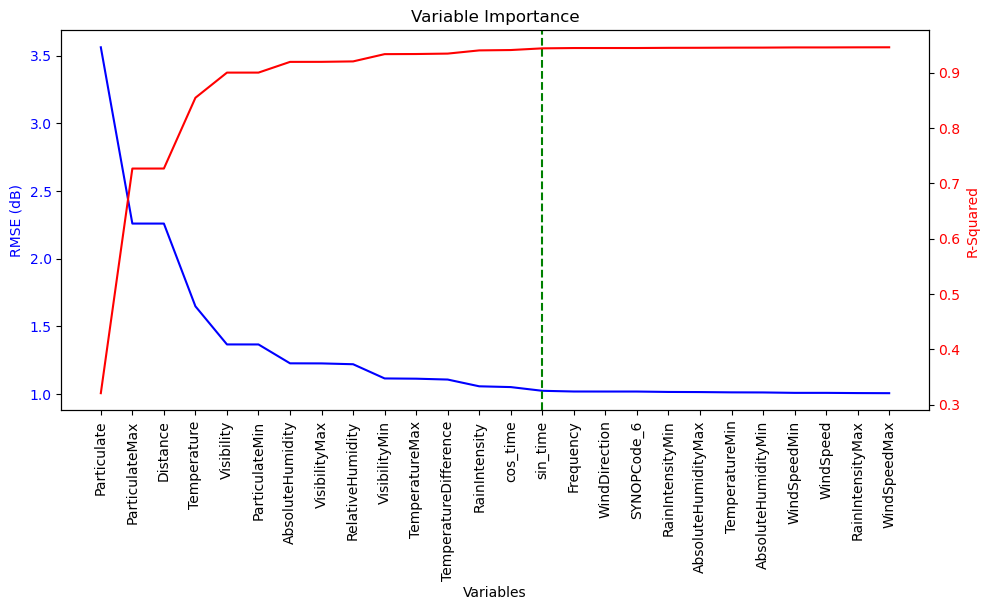

In [30]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 14
cutoff_variable = rankings_table_sorted_FSO.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [41]:
selected_features_FSO = [
    'RainIntensity',
    'TemperatureDifference',
    'TemperatureMax',
    'VisibilityMin',
    'RelativeHumidity',
    'VisibilityMax',
    'AbsoluteHumidity',
    'ParticulateMin',
    'Visibility',
    'Temperature',
    'Distance',
    'ParticulateMax',
    'Particulate'
]


In [42]:
# Select only the chosen features for training and testing
X_train_selected_FSO = X_train_FSO[selected_features_FSO]
X_test_selected_FSO = X_test_FSO[selected_features_FSO]

# Retrain the model with the selected features and best hyperparameters
final_model_FSO = RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_FSO = final_model_FSO.predict(X_test_selected_FSO)

# Calculate RMSE and R-squared on the testing set
test_rmse_FSO = mean_squared_error(y_test_FSO, predictions_FSO, squared=False)
test_r2_FSO = r2_score(y_test_FSO, predictions_FSO)

print(f"Test RMSE: {test_rmse_FSO}")
print(f"Test R^2: {test_r2_FSO}")


Test RMSE: 1.0775739769839983
Test R^2: 0.9364002314213495


In [ ]:
 0.9364002314213495

# Plot

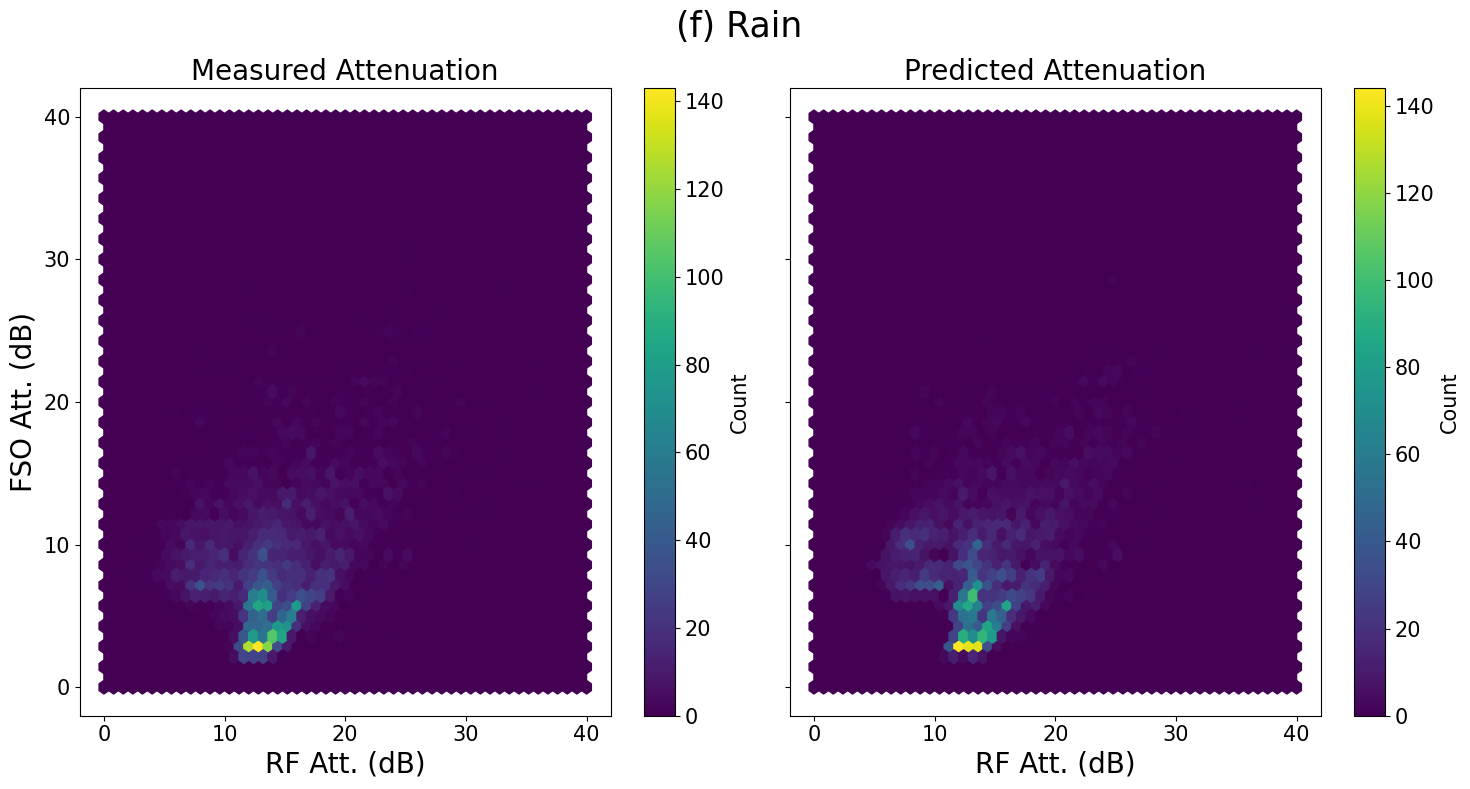

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are the numpy arrays you've prepared with your data
measured_attenuation_RFL = np.array(y_test_RFL)
predicted_attenuation_RFL = np.array(predictions_RFL)
measured_attenuation_FSO = np.array(y_test_FSO)
predicted_attenuation_FSO = np.array(predictions_FSO)

# Set up the matplotlib figure (adjust figsize to closely match the aspect ratio of the example image)
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Define the extent and ticks for the plots
extent = [0, 40, 0, 40]
ticks = [0, 10, 20, 30, 40]

# Heatmap for Measured FSO Attenuation vs RF Attenuation
hb1 = ax[0].hexbin(measured_attenuation_RFL, measured_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[0].set_title('Measured Attenuation', fontsize=20)
ax[0].set_xlabel('RF Att. (dB)', fontsize=20)
ax[0].set_ylabel('FSO Att. (dB)', fontsize=20)
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
cb1 = fig.colorbar(hb1, ax=ax[0])
cb1.set_label('Count', fontsize=15)

# Heatmap for Predicted FSO Attenuation vs RF Attenuation
hb2 = ax[1].hexbin(predicted_attenuation_RFL, predicted_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[1].set_title('Predicted Attenuation', fontsize=20)
ax[1].set_xlabel('RF Att. (dB)', fontsize=20)
ax[1].set_xticks(ticks)
ax[1].set_yticks(ticks)  # This may be redundant since y-axis is shared with the first plot
cb2 = fig.colorbar(hb2, ax=ax[1])
cb2.set_label('Count', fontsize=15)

plt.suptitle('(f) Rain ',fontsize=25)


ax[0].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
ax[1].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
cb1.ax.tick_params(labelsize=15) 
cb2.ax.tick_params(labelsize=15) 
plt.tight_layout()
plt.show()


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_27068\2555491670.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_27068\2555491670.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


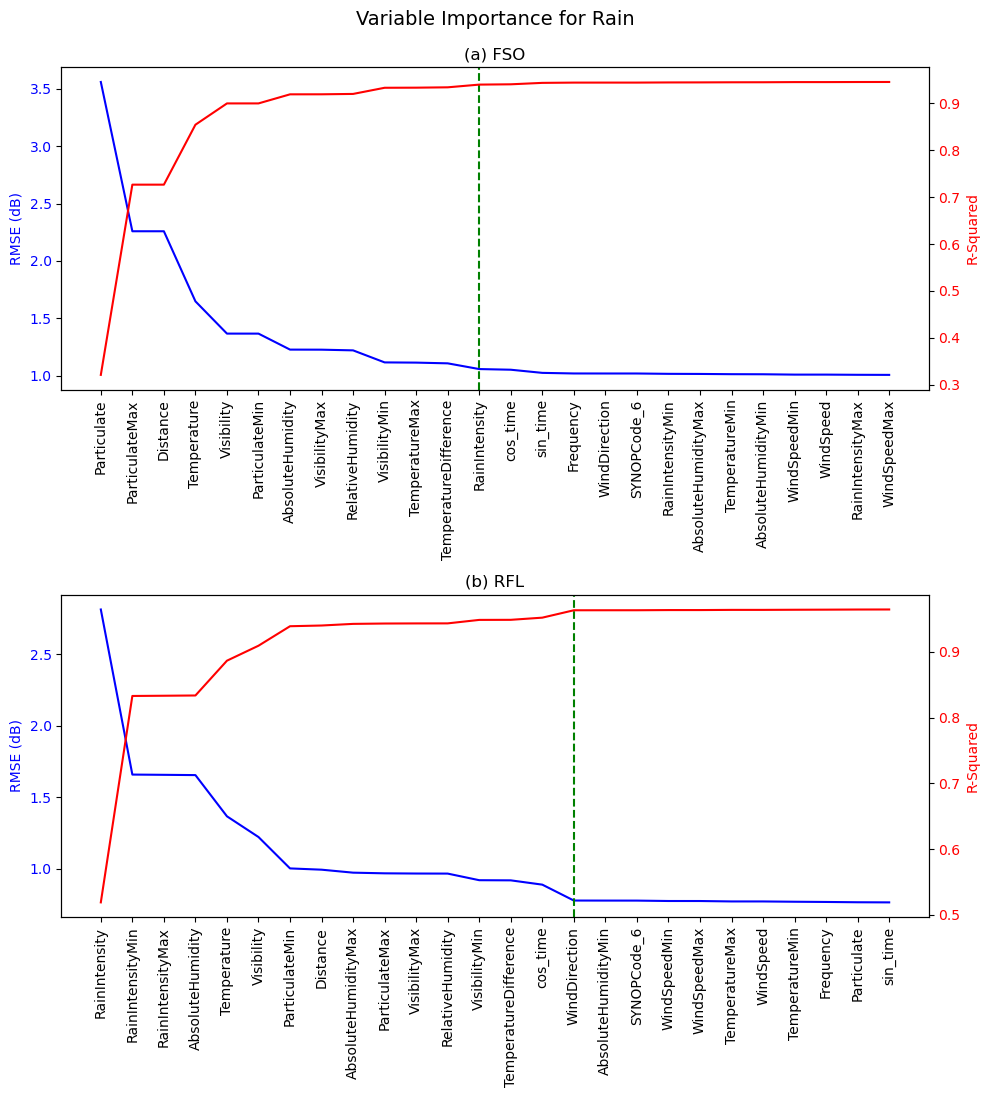

In [48]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 12  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 15  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance for Rain', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()
